#####  **Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#####  **Load Cleaned Data**

In [2]:
file_path = "../resources/data/output/customer_churn_cleaned.csv"   
df = pd.read_csv(file_path)

In [3]:
df.head()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_SMS,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [4]:
df.shape

(2850, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             2850 non-null   int64  
 1   complains                2850 non-null   int64  
 2   subscription_length      2850 non-null   int64  
 3   charge_amount            2850 non-null   int64  
 4   seconds_of_use           2850 non-null   int64  
 5   frequency_of_use         2850 non-null   int64  
 6   frequency_of_SMS         2850 non-null   int64  
 7   distinct_called_numbers  2850 non-null   int64  
 8   age_group                2850 non-null   int64  
 9   tariff_plan              2850 non-null   int64  
 10  status                   2850 non-null   int64  
 11  age                      2850 non-null   int64  
 12  customer_value           2850 non-null   float64
 13  churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)

#####  **Descriptive Statistics**

In [8]:
# Calculate descriptive statistics for numerical features.
# Exclude categorical features like 'complains', 'charge_amount', 
# 'age_group', 'tariff_plan', 'status', and 'churn'
descriptive_stats = df.drop(
    columns=['complains', 'charge_amount', 'age_group', 'tariff_plan', 'status', 'churn']
).describe()

descriptive_stats

,call_failure,subscription_length,seconds_of_use,frequency_of_use,frequency_of_SMS,distinct_called_numbers,age,customer_value
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,7.802456,32.452982,4534.243158,70.484912,73.789825,23.870526,31.077193,474.990367
std,7.326172,8.723075,4199.712303,57.401512,112.062397,17.193929,8.861934,514.442198
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,1.000000,29.000000,1458.750000,28.000000,7.000000,11.000000,25.000000,117.527500
50%,6.000000,35.000000,3041.000000,54.500000,22.000000,21.000000,30.000000,232.520000
75%,12.000000,38.000000,6500.000000,96.000000,88.000000,34.000000,30.000000,790.080000
max,36.000000,47.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000


##### **Distribution of Numerical Features**

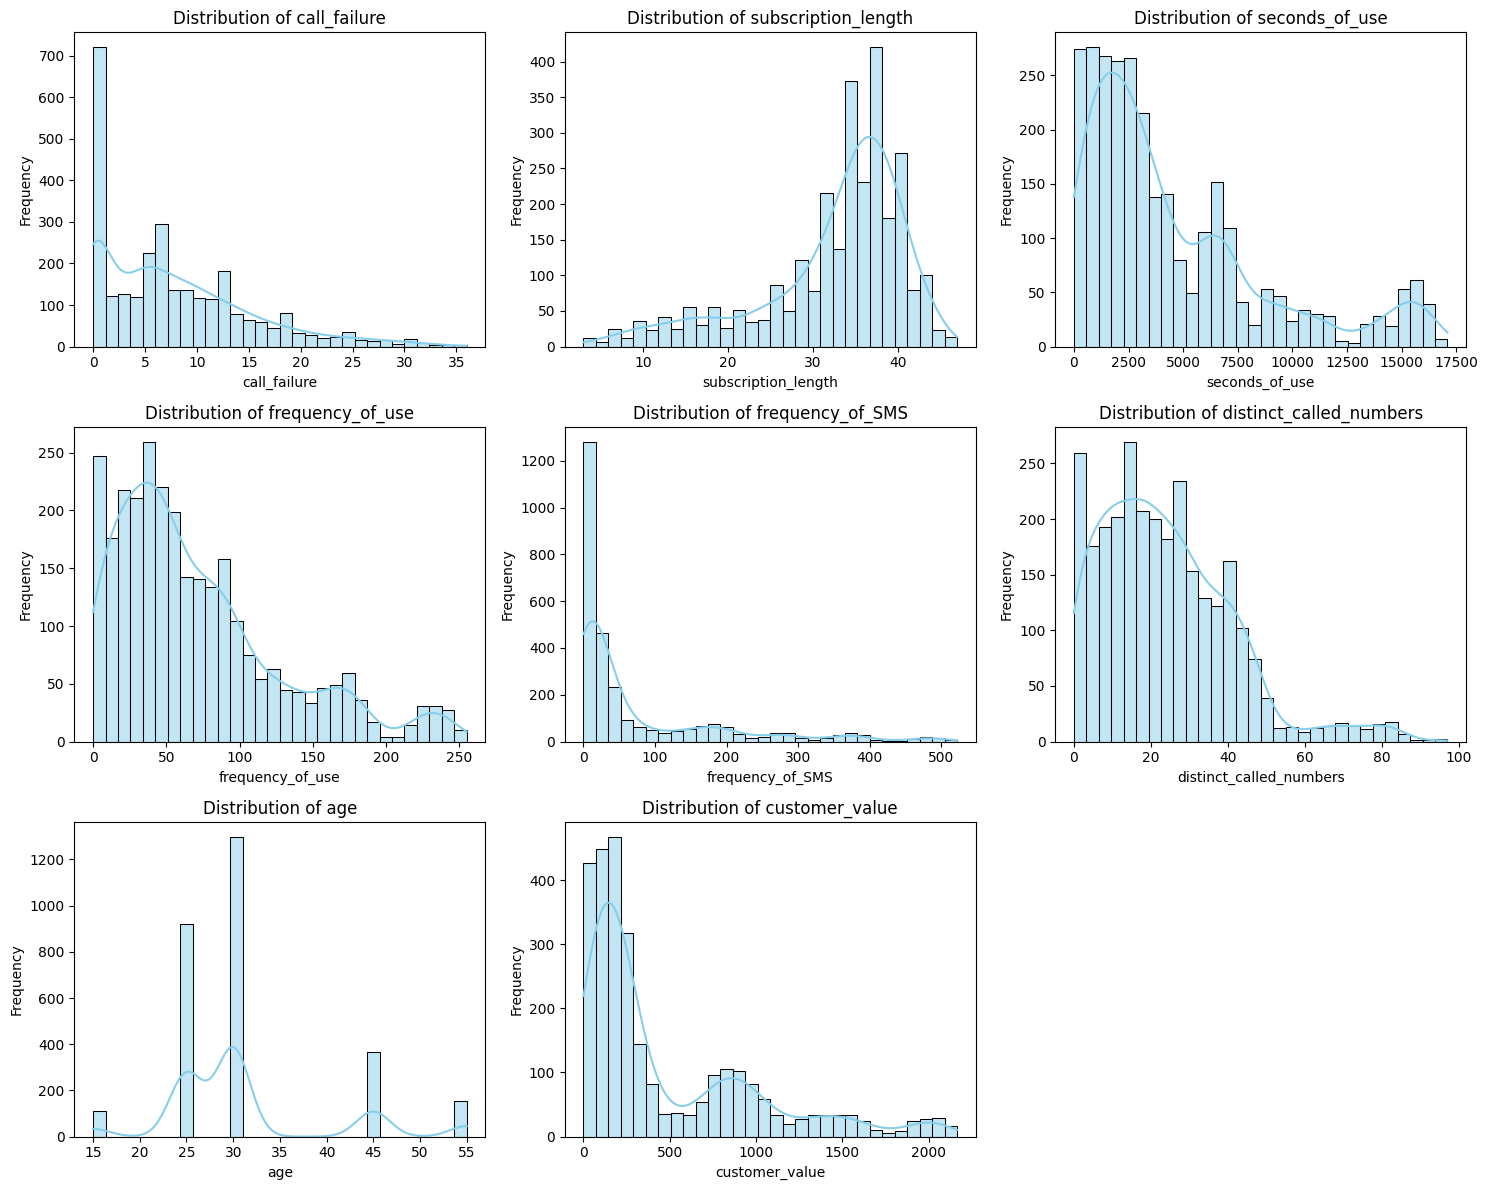

In [15]:
# Define numerical columns
numerical_cols = [
    'call_failure', 'subscription_length', 'seconds_of_use',
    'frequency_of_use', 'frequency_of_SMS', 'distinct_called_numbers',
    'age', 'customer_value'
]

# Set figure size
plt.figure(figsize=(15, 12))  

# Loop through numerical columns and plot histograms
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)   
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')   
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Call Failures**: Shows a right-skewed distribution with most users experiencing 0-5 call failures, with the frequency dramatically decreasing after that.
- **Subscription Length**: Appears normally distributed with a peak around 30-40 months, suggesting most customers maintain subscriptions for about 2.5-3.5 years.
- **Seconds of Use**: Right-skewed distribution with most usage falling between 0-5000 seconds, though some users show very high usage up to 17500 seconds.
- **Frequency of Use**: Right-skewed with most users falling in the 0-100 range, indicating varied usage patterns among customers.
- **Frequency of SMS**: Highly right-skewed with a large spike at 0-50, suggesting many customers use SMS sparingly.
- **Distinct Called Numbers**: right-skewed distribution centered around 20-30 different numbers called per customer.
- **Age**: Multi-modal distribution with major peaks around ages 25 and 30, indicating distinct customer age groups.
- **Customer Value**: Right-skewed with most customers concentrated in the lower value range (0-500), with a long tail extending to 2000.

##### **Distribution of Categorical Features**

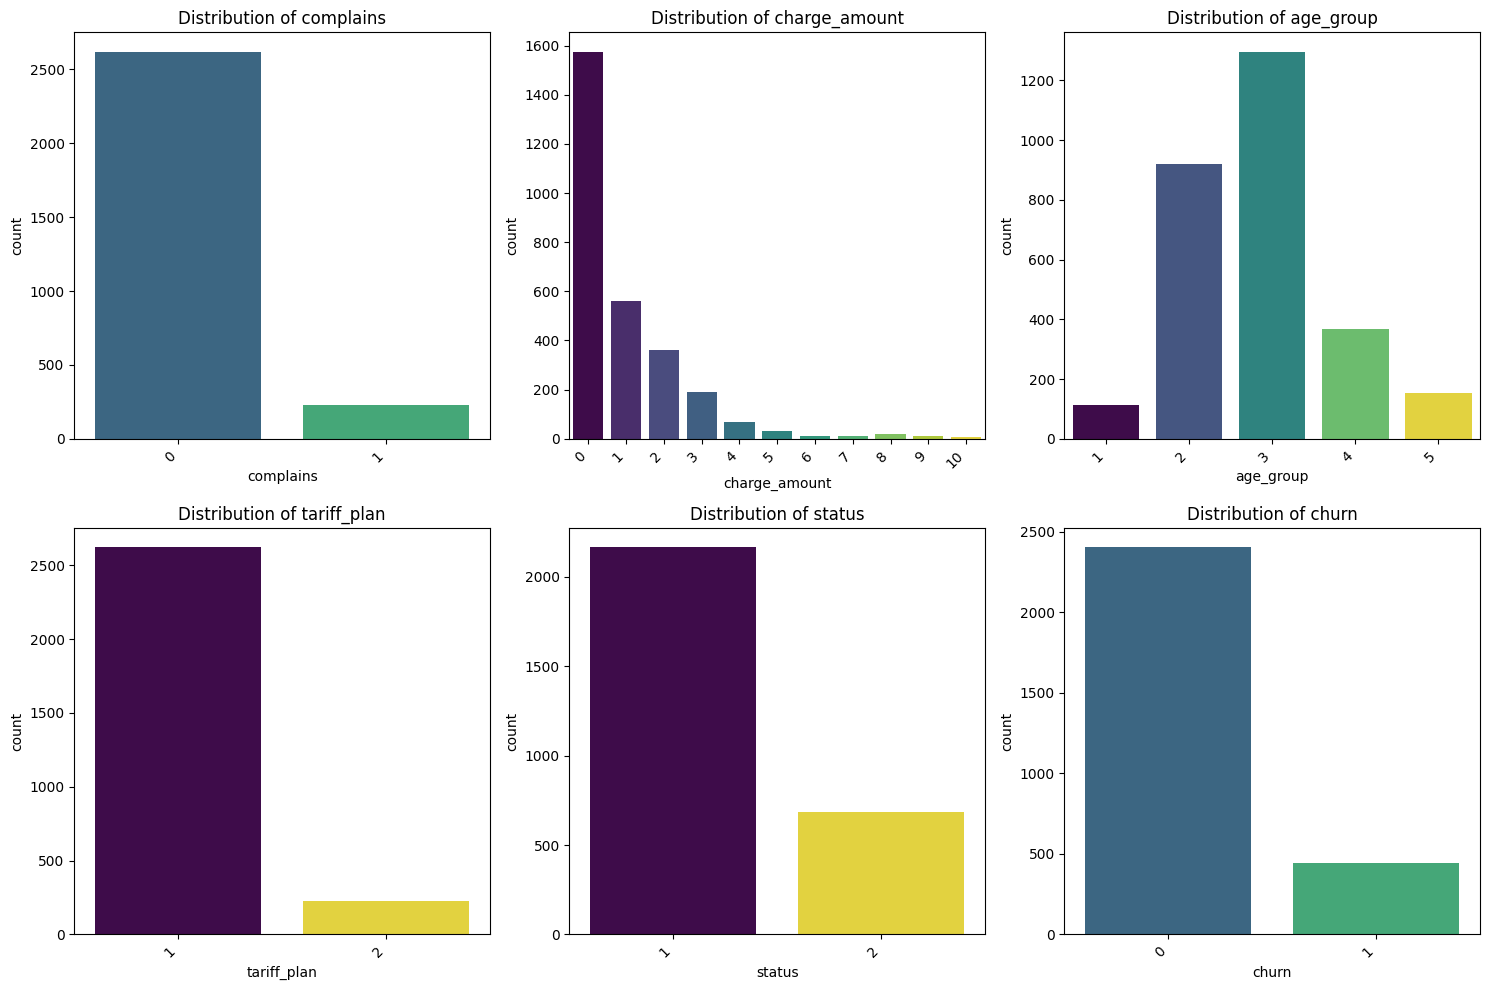

In [10]:
categorical_cols = ['complains', 'charge_amount', 'age_group', 'tariff_plan', 'status', 'churn']

# Set the figure size for better readability
plt.figure(figsize=(15, 10))  # Adjusted size for more columns

# Loop through the categorical columns and create a countplot for each
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)  # Corrected line
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- **Complaints**: Most customers (approximately 2500) have 0 complaints, with a much smaller number (around 250) having 1 complaint, showing excellent customer satisfaction overall.
- **Charge Amount**: Highly right-skewed distribution with most customers having charges between 0-2, and frequency decreasing sharply after that. Very few customers have charges above 5.
- **Age Group**: Shows an uneven distribution across 5 groups:
    - Peak in group 3 (approximately 1300 customers)
    - Second highest in group 2 (about 900 customers)
    - Lower numbers in groups 4 and 5
    - Smallest representation in group 1
- **Tariff Plan**: Binary distribution showing two plans, with Plan 1 being significantly more popular (about 2500 customers) compared to Plan 2 (around 200 customers).
- **Status**: Binary distribution showing two statuses, with Status 1 having about 2000 customers and Status 2 having approximately 700 customers.
- **Churn**: Binary distribution showing churn status, with about 2400 customers in category 0 (likely retained customers) and around 400 in category 1 (likely churned customers), indicating a relatively low churn rate.

##### **Analyzing Relationships with Churn**

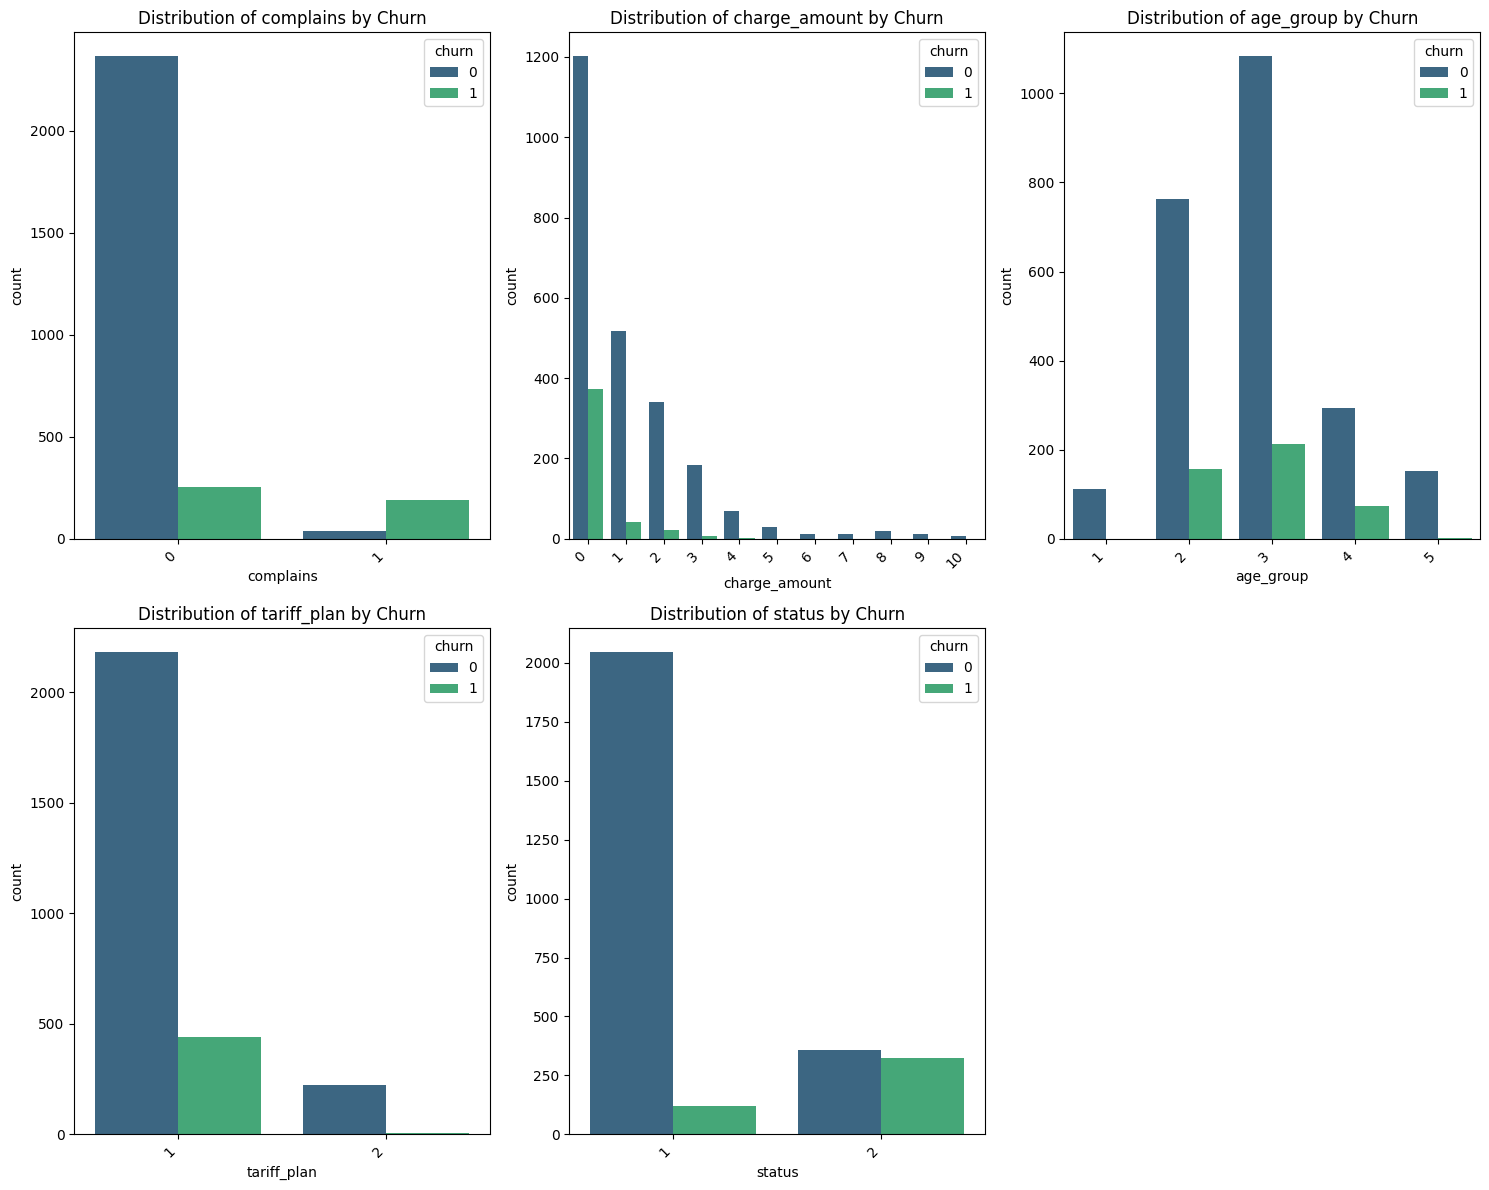

In [14]:
# Remove 'churn' from categorical_cols
categorical_cols.remove('churn')

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue='churn', palette='viridis')  # hue='churn' remains as is
    plt.title(f'Distribution of {col} by Churn')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- **Complaints**: Most retained customers (0) have no complaints, while churned customers (1) show a higher proportion of complaints, suggesting customer service issues may influence churn.
- **Charge Amount**: Churned customers tend to have slightly lower charge amounts overall, particularly in the 0-2 range.
- **Age Groups**: Churn appears more in age groups 2-3, with retained customers having stronger representation across all age segments. Age group 3 shows the highest customer concentration for both churned and retained customers.
- **Tariff Plan**: Plan 1 (Pay as you go) has significantly more customers than Plan 2 (contractual), with both plans showing some churn but Plan 1 having a higher proportion of retained customers.
- **Status**: Status 1 (active) shows a much higher retention rate compared to Status 2(non-active), where the churn rate appears more balanced, suggesting Status 2 customers might be more prone to leaving.

#### **Detect outliers in Numerical Features**

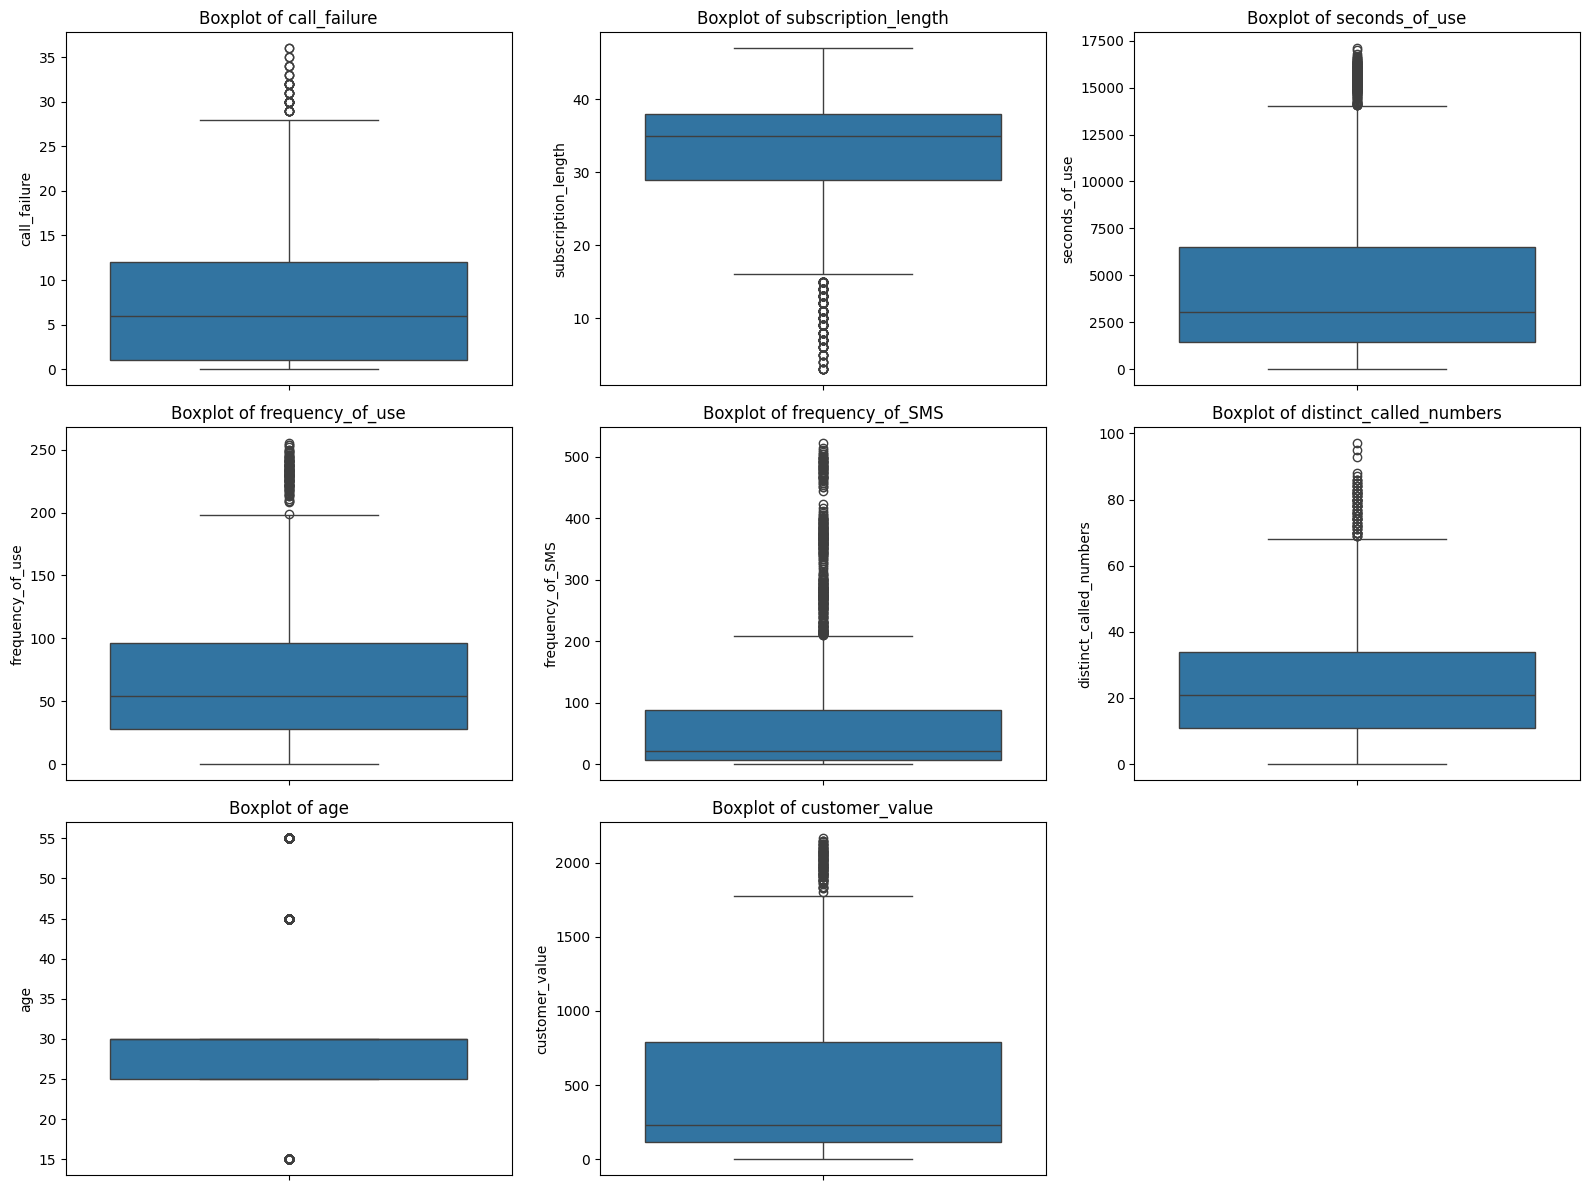

In [17]:

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

##### **Correlation Heatmap**

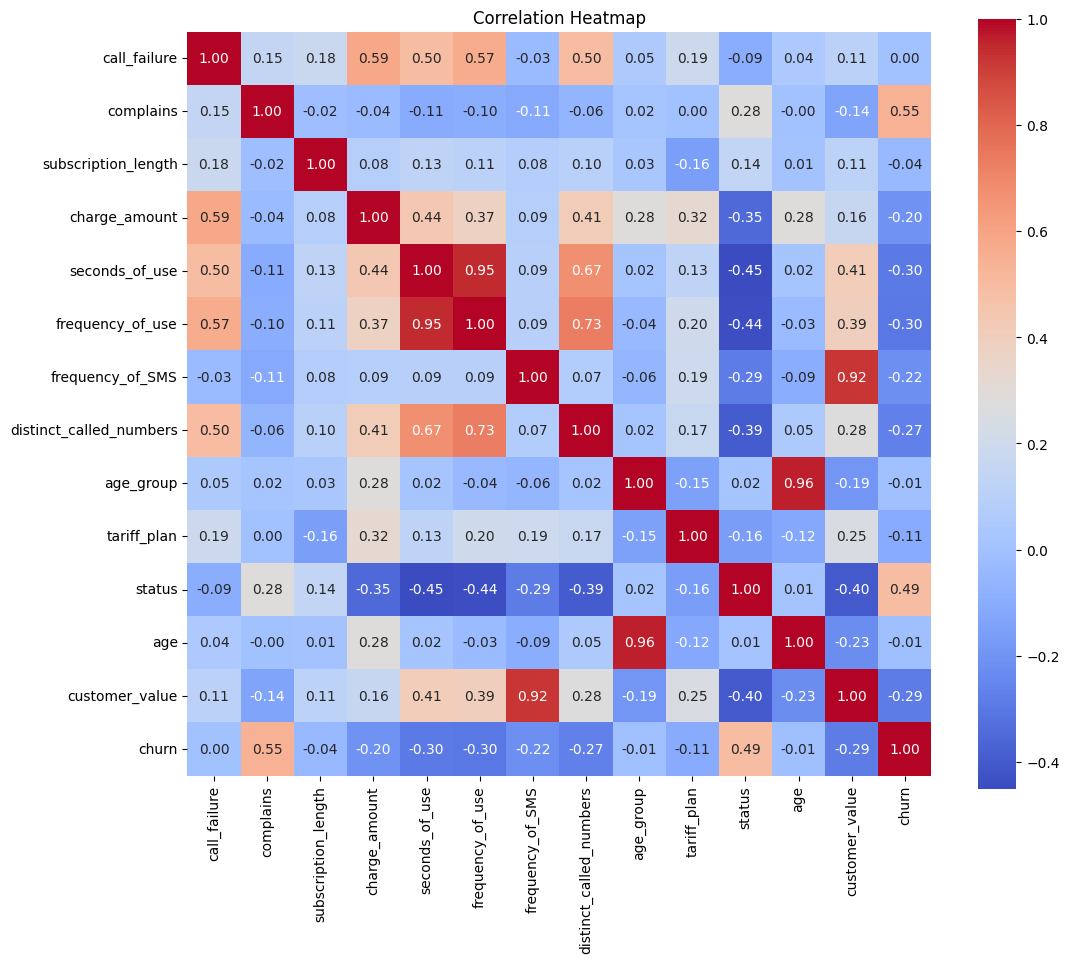

In [16]:
# Correlation heatmap to visualize feature relationships
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

**For Customer Value Regression:**

- Strong positive correlation between frequency of SMS and customer value (0.92)
- Moderate positive correlations with seconds of use (0.41) and frequency of use (0.39)

**For Churn Classification:**

- Moderate positive correlation with complaints (0.55) - higher complaints lead to higher churn
- Moderate positive correlation with status (0.49)
- Negative correlations with seconds of use (-0.30) and frequency of use (-0.30) - higher usage associated with lower churn

**Highly Correlated Features to check for multicollinearity:**

- Age and age group (0.96)
- Seconds of use and frequency of use (0.95)
- Frequency of use and distinct called numbers (0.73)